<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Variational_Analysis_and_Reliability_Modeling_Algorithms_(VARMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib seaborn --user -q --no-warn-location


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-warn-location


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pylab import rcParams
from datetime import datetime, timedelta
from sklearn import metrics
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Money.csv',index_col=0, parse_dates=True) ## Reading the Money dataframe
df1=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Spending.csv',index_col=0, parse_dates=True) ## Reading the Spending dataframe

In [3]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Money   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [5]:
df1.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Spending  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [7]:
df=df.join(df1)

In [8]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [9]:
df.isnull().sum()

Money       0
Spending    0
dtype: int64

In [10]:
df.dropna(inplace=True)

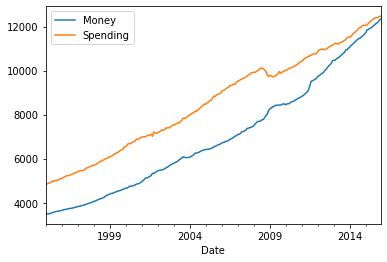

In [11]:
df.plot()

In [15]:
df_transformed = df.diff()
df_transformed = df_transformed.dropna()
test = df_transformed.head()

In [16]:
nobs = 12
train = df_transformed[0:-nobs]
test = df_transformed[-nobs:]

In [17]:
model = VARMAX(train, order =(1,1), trend = 'c')

In [18]:
results = model.fit(maxiter = 1000, disp = False)
print(results.summary())

                             Statespace Model Results                            
Dep. Variable:     ['Money', 'Spending']   No. Observations:                  239
Model:                        VARMA(1,1)   Log Likelihood               -2300.043
                             + intercept   AIC                           4626.086
Date:                   Fri, 10 Feb 2023   BIC                           4671.280
Time:                           14:15:46   HQIC                          4644.298
Sample:                       02-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):             0.34, 0.00   Jarque-Bera (JB):       380.05, 197.35
Prob(Q):                        0.56, 0.96   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         4.51, 2.48   Skew:                      1.16, -0.63
Prob(H) (t

In [19]:
print('AIX of the VARMA model is {}'.format(results.aic))

AIX of the VARMA model is 4626.086350866926
